## Libraries

In [1]:
import random
import operator

## Genetic Algorithm Functions

### Fitness Function

In [2]:
def fitness(gene, target):
    score = ((target[0] - 36*gene[0] - 16*gene[1] - 43*gene[2] - 36*gene[3])**2 +
             (target[1] - 23*gene[0] - 13*gene[1] - 25*gene[2]- 28*gene[3])**2 +
             (target[2] - 26*gene[0] - 16*gene[1] - 26*gene[2]- 32*gene[3])**2)
    return score

### Initial Population functions

In [3]:
def generateChild():
    gene = []
    for i in range(4):
        chrom = random.randint(0,5)
        gene.append(chrom)
    return gene

In [4]:
def generatePop(popSize):
    population = []
    i = 0
    while i < popSize:
        population.append(generateChild())
        i+=1
    #population.pop(len(population))
    print(population)
    return population

### Calculation performance of genes

In [5]:
def computePerfPopulation(population):
    populationPerf = {}
    for gene in population:
        gName = str(gene)
        populationPerf[gName] = fitness(gene, tarNut)
    return sorted(populationPerf.items(), key = operator.itemgetter(1), reverse = False)

### Selecting to Breed

In [6]:
def selectFromPopulation(sPop, best_sample, lucky_few):
    nextGeneration = []    
    for i in range(best_sample):
        nextGeneration.append(sPop[i][0])
    for i in range(lucky_few):
        nextGeneration.append(random.choice(sPop)[0])
        random.shuffle(nextGeneration)
    return nextGeneration

In [7]:
def betterDestring(sortedpop):
    i = 0
    for i in range(len(sortedpop)):
        sortedpop[i] = sortedpop[i].replace("[", "")
        sortedpop[i] = sortedpop[i].replace("]", "")
        sortedpop[i] = sortedpop[i].split(",")
        sortedpop[i] = list(map(int, sortedpop[i]))
        i += 1

    return sortedpop

### Breeding

In [8]:
def createChild(parent1, parent2):
    child = []
    for i in range(len(parent1)):
        if(int(100*random.random()) < 50):
            child.append(parent1[i])
        else:
            child.append(parent2[i])
    return child

In [9]:
def createChildren(breeders, number_of_child):
    nextPopulation = []
    for i in range(int(len(breeders)/2)):
        for j in range(number_of_child):
            nextPopulation.append(createChild(breeders[i],breeders[len(breeders) -1 -i]))
    return nextPopulation

### Mutation

In [10]:
def mutate(gene):
    index_mod = random.randint(0, 3)
    gene[index_mod] = random.randint(0,5)
    return gene


In [11]:
def mutatePopulation(population, chance_of_mutation):
    for i  in range(len(population)):
        if random.random()*100 < chance_of_mutation:
            population[i] = mutate(population[i])
        return population

# Creating Multiple Generations

In [12]:
def nextGeneration(firstGeneration, best_sample, lucky_few, number_of_child, chance_of_mutation):
    populationSorted = computePerfPopulation(firstGeneration)
    nextBreeders = selectFromPopulation(populationSorted, best_sample, lucky_few)
    destringBreeders = betterDestring(nextBreeders)
    nextPopulation = createChildren(destringBreeders, number_of_child)
    nextGeneration = mutatePopulation(nextPopulation, chance_of_mutation)
    
    return nextGeneration

In [13]:
def multipleGeneration(number_of_generation, popSize, best_sample, lucky_few, number_of_child, chance_of_mutation):
    historic = []
    historicBest = []
    initialpop = generatePop(popSize)
    historic.append(initialpop)
    historicBest.append(getBestIndividualFromPopulation(initialpop))
    for i in range (number_of_generation):
        historic.append(nextGeneration(historic[i], best_sample, lucky_few, number_of_child, chance_of_mutation))
    return historic
    return historicBest


# Analysis

In [14]:
def getBestIndividualFromPopulation(population):
    return(computePerfPopulation(population)[0])

In [15]:
def storeBestHistoric(historic):
    historicBest = []
    historicBestScore = []
    for population in historic:
        historicBest.append(getBestIndividualFromPopulation(population))
    for i in historicBest:
        historicBestScore.append(i[1])
    return historicBest, historicBestScore


### Graphing

In [17]:
import matplotlib.pyplot as plt

In [18]:

def PlotCost(history):
    plt.figure(figsize = (30,15))
    plt.plot(history)
    plt.show()
    


# Initiate

In [19]:
tarNut = [300, 80, 200]

[[2, 4, 4, 2], [1, 0, 2, 4], [1, 1, 5, 3], [0, 5, 2, 1], [3, 2, 1, 3], [4, 0, 3, 1], [3, 5, 0, 4], [2, 4, 4, 5], [5, 2, 5, 0], [2, 0, 0, 4], [4, 4, 2, 0], [4, 3, 1, 5], [4, 0, 4, 3], [5, 2, 3, 3], [0, 5, 0, 0], [0, 0, 3, 4], [2, 0, 2, 0], [5, 4, 1, 0], [4, 1, 3, 1], [0, 2, 2, 0], [1, 1, 5, 5], [1, 2, 3, 5], [4, 4, 5, 5], [2, 1, 1, 3], [2, 1, 5, 0], [4, 5, 1, 4], [3, 0, 0, 1], [5, 5, 4, 3], [2, 1, 0, 1], [3, 2, 5, 1], [3, 0, 5, 4], [4, 1, 1, 1], [1, 2, 1, 4], [4, 1, 0, 1], [0, 0, 3, 2], [3, 5, 1, 2], [4, 2, 1, 3], [4, 3, 2, 3], [4, 2, 0, 0], [5, 2, 5, 4], [1, 3, 2, 5], [4, 2, 0, 4], [3, 5, 0, 3], [4, 5, 1, 1], [2, 3, 4, 0], [5, 1, 3, 1], [3, 1, 5, 3], [3, 3, 3, 3], [1, 2, 3, 5], [5, 1, 2, 3], [2, 1, 3, 5], [1, 1, 4, 1], [4, 0, 3, 4], [3, 3, 0, 1], [3, 2, 0, 4], [4, 4, 3, 2], [5, 0, 3, 4], [4, 0, 4, 5], [2, 2, 0, 2], [5, 5, 2, 2], [1, 0, 4, 4], [2, 4, 3, 4], [4, 0, 3, 4], [5, 5, 0, 1], [1, 1, 2, 4], [3, 3, 3, 3], [1, 5, 3, 5], [5, 2, 1, 1], [2, 1, 0, 5], [3, 2, 1, 2], [2, 5, 5, 5], [1, 0

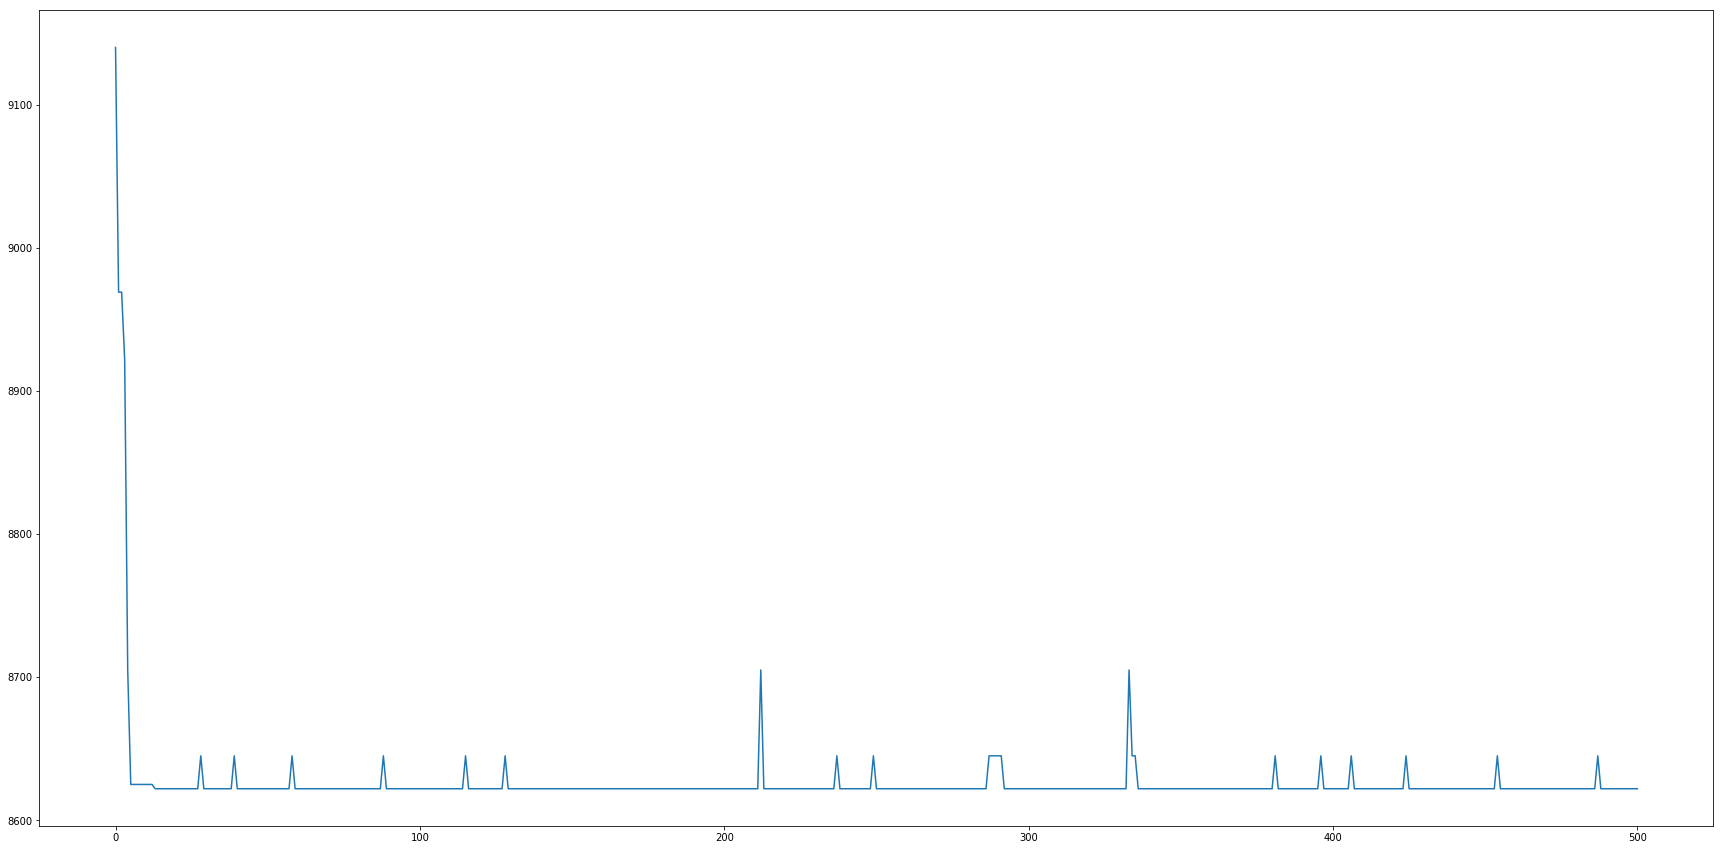

In [23]:

history = multipleGeneration(500, 100, 20, 5, 8, 0.1)
historicBest, historicBestScore = storeBestHistoric(history)
PlotCost(historicBestScore)